In [1]:
import os
from os.path import join
import pickle
import sys
import numpy as np
import pandas as pd
from scipy.stats import sem
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import seaborn as sn

In [2]:
thisPath = os.getcwd()
os.chdir("../../code")
projectDir = os.getcwd()
from evalUtils import plotModelHist, UrgentVRoutne

Using TensorFlow backend.


In [5]:
os.chdir("../")

In [6]:
os.getcwd()

'D:\\Projects\\OCT-Image-Classification'

In [3]:
os.chdir(thisPath)

In [3]:
def reportBinaryScores(yTrueUrgent, yPredProbUrgent, v=0):
    yPredUrgent = yPredProbUrgent.round().astype(np.int)
    tn, fp, fn, tp = confusion_matrix(yTrueUrgent.astype(np.float), 
                                      yPredUrgent).ravel()
    tpr = tp/(tp + fn)
    tnr = tn/(tn + fp)
    fpr = fp/(fp + tn)
    fnr = fn/(fn + tp)
    plr = tpr/fpr #positive likelihood ratio
    nlr = fnr/tnr # negative likelihood ratio
    acc = accuracy_score(yTrueUrgent, 
                         yPredUrgent)
    if v:
        print('\t accuracy: {0:.3g}'.format(acc))
        print("\t sensitivity {0:.3g}".format(tpr))
        print("\t specificity {0:.3g}".format(tnr))
        print("\t positive likelihood ratio {0:.3g}".format(plr))
        print("\t negative likelihood ratio {0:.3g}".format(nlr))
        print("\n")
    return acc, tpr, tnr, plr, nlr

def plotLosses(varainceExperimentDir, modelName):
    modelHistPathList = []
    bestModelPath = []
    for i in range(1, 11):
        expPathi = join(varainceExperimentDir, str(i))
        files = os.listdir(expPathi)
        modelDir = [f for f in files if modelName in f]
        assert(len(modelDir)==1)
        modelPathi = join(expPathi, modelDir[0])
        modelHistPath = join(modelPathi, "modelHistory.pickle")
        modelPath = join(modelPathi, "{}.hdf5".format(modelName))
        modelHistPathList.append(modelHistPath)
        bestModelPath.append(modelPath)
        assert(os.path.isfile(modelHistPath))
        assert(os.path.isfile(modelPath))

    #Plot training loss
    for i, modelHistPath in enumerate(modelHistPathList):
        with open(modelHistPath, 'rb') as fid:
            print('subsample {}'.format(i+1))
            modelHist = pickle.load(fid)
            plotModelHist(modelHist)
            
"""
def plotMetrics(AccList, sensList, specList, labelsList, nModels=1):
    n_groups = nModels + 1
    means_men = (20, 35, 30, 35, 27)
    std_men = (2, 3, 4, 1, 2)

    means_women = (25, 32, 34, 20, 25)
    std_women = (3, 5, 2, 3, 3)

    fig, ax = plt.subplots()

    index = np.arange(n_groups)
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, means_men, bar_width,
                    alpha=opacity, color='b',
                    yerr=std_men, error_kw=error_config,
                    label='Men')

    rects2 = ax.bar(index + bar_width, means_women, bar_width,
                    alpha=opacity, color='r',
                    yerr=std_women, error_kw=error_config,
                    label='Women')

    ax.set_xlabel('Group')
    ax.set_ylabel('Scores')
    ax.set_title('Scores by group and gender')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
    ax.legend()

    fig.tight_layout()
    plt.show()
"""

In [4]:
reportedAcc = 0.934
reportedSens = 0.966
reportedSpec = 0.94
reportedAuc = 0.988

# VGG16

subsample 1


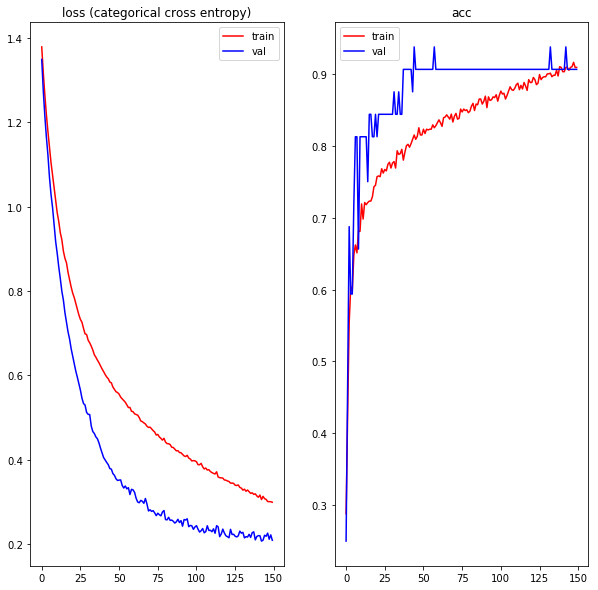

subsample 2


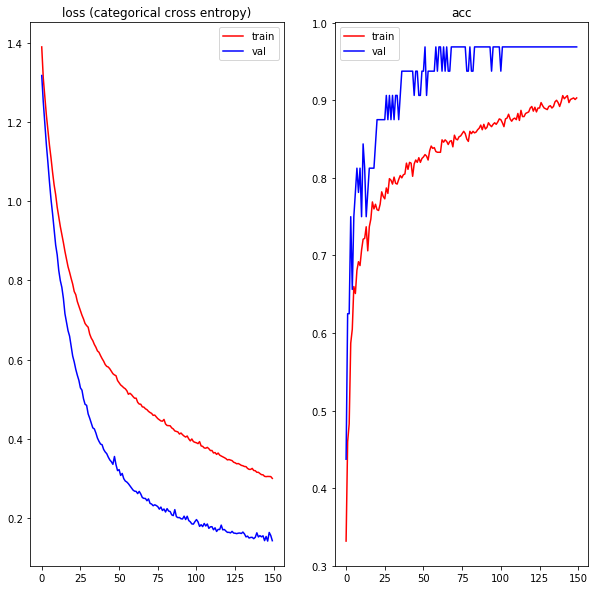

subsample 3


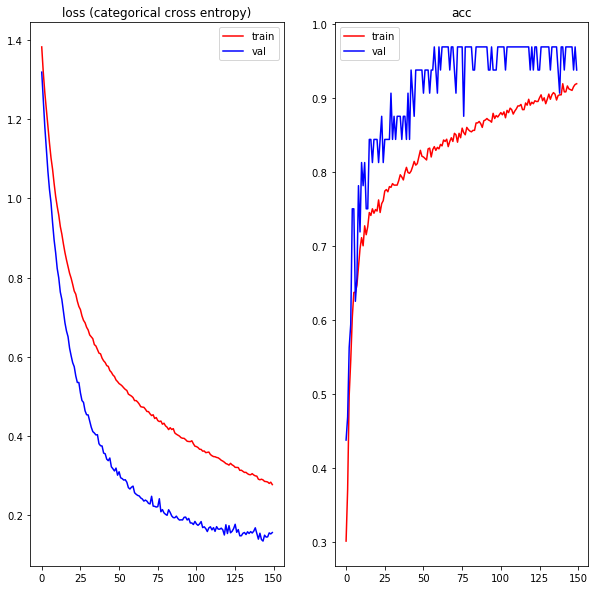

subsample 4


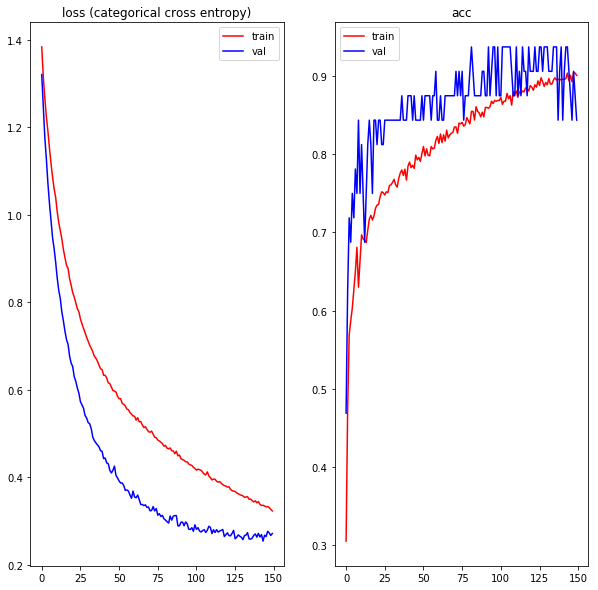

subsample 5


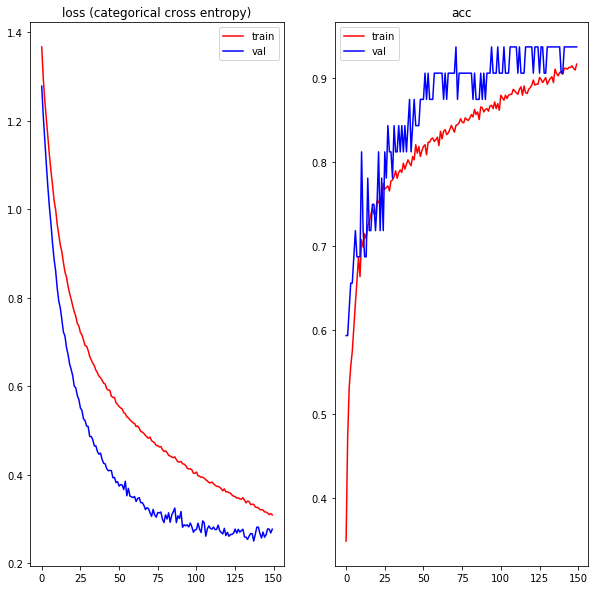

subsample 6


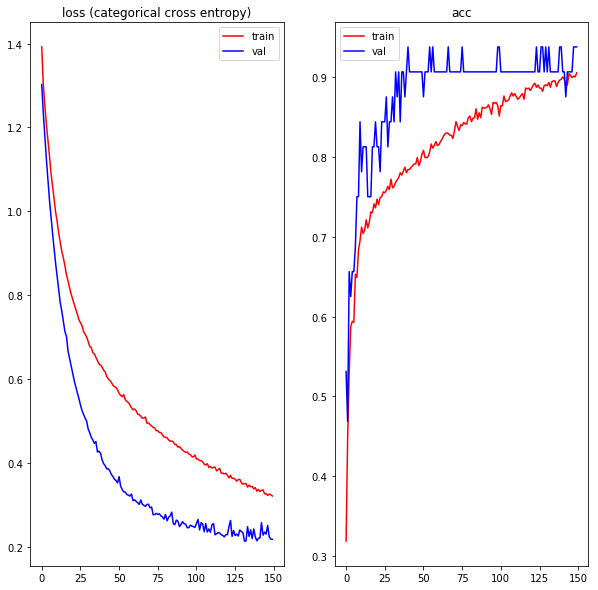

subsample 7


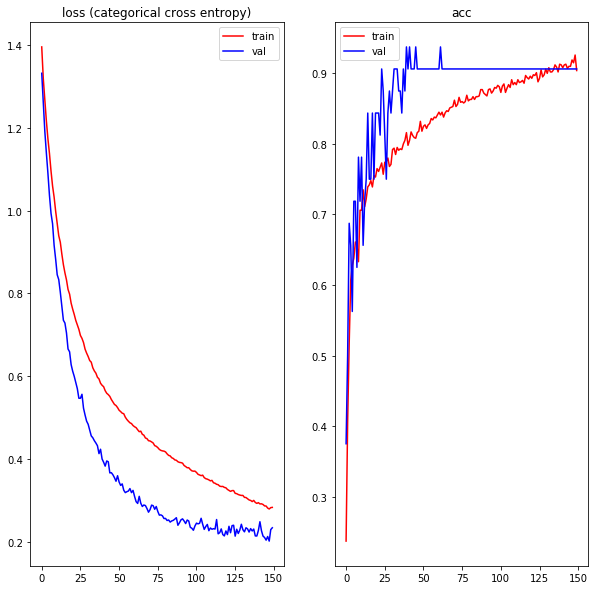

subsample 8


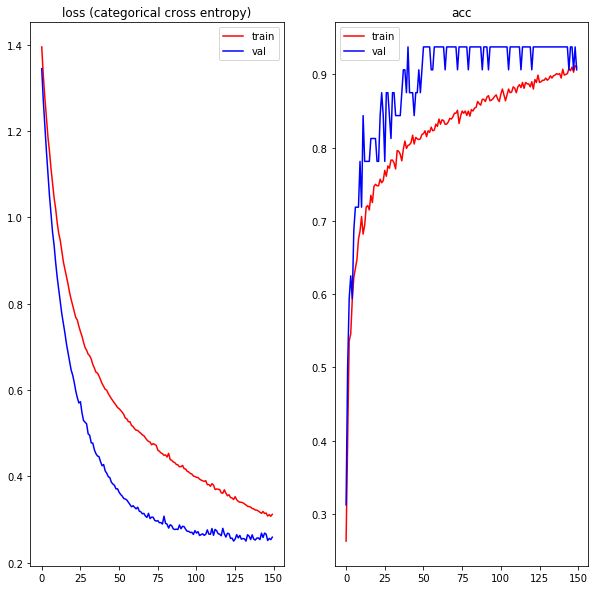

subsample 9


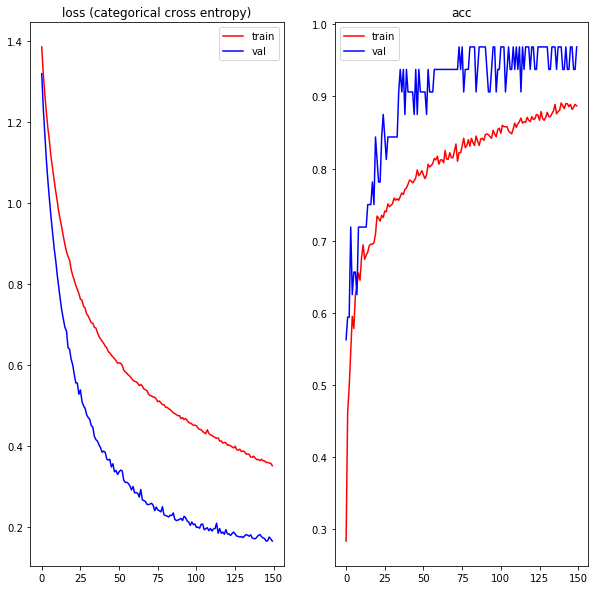

subsample 10


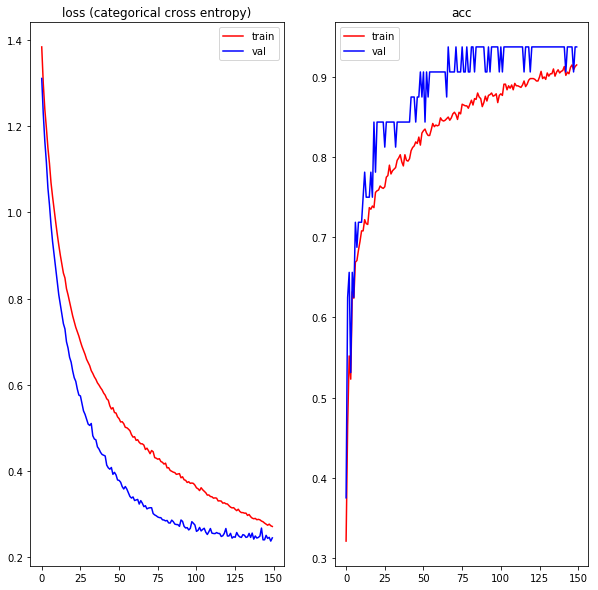

In [5]:
varainceExperimentDirVGG16 = join(projectDir, "..\modelOutput\subsample")
plotLosses(varainceExperimentDirVGG16, modelName="VGG16")

In [9]:
VGG16PredPath = r"VGG16\modelPredUrgetDF.csv"
modelPredUrgetDF = pd.read_csv(join(thisPath, VGG16PredPath), index_col=0)

In [10]:
AccListVGG16 = []
SensListVGG16 = []
SpecListVGG16 = []

aucListVGG16 = []
fprsListVGG16 = []
tprsListVGG16 = []

yTrueUrgent = modelPredUrgetDF['yTrue'].values
for i in range(0, 10):
    yPredProbUrgent = modelPredUrgetDF['yPredProb_' + str(i)].values
    scores = reportBinaryScores(yTrueUrgent, yPredProbUrgent, v=1)
    acc, tpr, tnr, plr, nlr = scores
    
    fprs, tprs, _ = roc_curve(yTrueUrgent, yPredProbUrgent)
    aucUrgent = auc(fprs, tprs)
    
    AccListVGG16.append(acc)
    SensListVGG16.append(tpr)
    SpecListVGG16.append(tnr)
    
    aucListVGG16.append(aucUrgent)
    fprsListVGG16.append(fprs)
    tprsListVGG16.append(tprs)

	 accuracy: 0.93
	 sensitivity 0.967
	 specificity 0.893
	 positive likelihood ratio 9
	 negative likelihood ratio 0.037


	 accuracy: 0.93
	 sensitivity 0.952
	 specificity 0.907
	 positive likelihood ratio 10.2
	 negative likelihood ratio 0.0524


	 accuracy: 0.943
	 sensitivity 0.971
	 specificity 0.915
	 positive likelihood ratio 11.5
	 negative likelihood ratio 0.0316


	 accuracy: 0.938
	 sensitivity 0.952
	 specificity 0.924
	 positive likelihood ratio 12.5
	 negative likelihood ratio 0.0515


	 accuracy: 0.946
	 sensitivity 0.955
	 specificity 0.938
	 positive likelihood ratio 15.4
	 negative likelihood ratio 0.0485


	 accuracy: 0.95
	 sensitivity 0.963
	 specificity 0.938
	 positive likelihood ratio 15.5
	 negative likelihood ratio 0.0396


	 accuracy: 0.936
	 sensitivity 0.959
	 specificity 0.913
	 positive likelihood ratio 11
	 negative likelihood ratio 0.0452


	 accuracy: 0.934
	 sensitivity 0.948
	 specificity 0.919
	 positive likelihood ratio 11.8
	 negative likelihood 

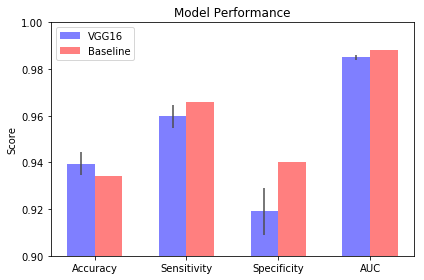

In [11]:
opacity = 0.5
error_config = {'ecolor': '0.3'}

VGG16Means = (np.mean(AccListVGG16),
              np.mean(SensListVGG16),
              np.mean(SpecListVGG16),
              np.mean(aucListVGG16))
seFactor = 2.0
VGG16SEs = (seFactor*sem(AccListVGG16),
            seFactor*sem(SensListVGG16),
            seFactor*sem(SpecListVGG16),
            seFactor*sem(aucListVGG16))
n_groups = len(VGG16Means)

reportedMetrics = [reportedAcc, 
                   reportedSens, 
                   reportedSpec,
                   reportedAuc]

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
rects1 = ax.bar(index, VGG16Means, bar_width,
                alpha=opacity, color='b',
                yerr=VGG16SEs, error_kw=error_config,
                label='VGG16')

rects2 = ax.bar(index + bar_width, reportedMetrics, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='Baseline')

#ax.set_xlabel('Group')
ax.set_ylabel('Score')
ax.set_title('Model Performance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Accuracy', 'Sensitivity', 'Specificity', 'AUC'))
ax.set_ylim([0.9, 1.0])
ax.legend()

fig.tight_layout()
plt.show()

In [12]:
VGG16AugPredPath = r"VGG16_AUG2\modelPredUrgetDF.csv"
modelPredUrgetDF = pd.read_csv(join(thisPath, VGG16AugPredPath), index_col=0)

In [13]:
AccListVGG16Aug = []
SensListVGG16Aug = []
SpecListVGG16Aug = []

aucListVGG16Aug = []
fprsListVGG16Aug = []
tprsListVGG16Aug = []

yTrueUrgent = modelPredUrgetDF['yTrue'].values
for i in range(0, 10):
    yPredProbUrgent = modelPredUrgetDF['yPredProb_' + str(i)].values
    scores = reportBinaryScores(yTrueUrgent, yPredProbUrgent, v=1)
    acc, tpr, tnr, plr, nlr = scores
    
    fprs, tprs, _ = roc_curve(yTrueUrgent, yPredProbUrgent)
    aucUrgent = auc(fprs, tprs)
    
    AccListVGG16Aug.append(acc)
    SensListVGG16Aug.append(tpr)
    SpecListVGG16Aug.append(tnr)
    
    aucListVGG16Aug.append(aucUrgent)
    fprsListVGG16Aug.append(fprs)
    tprsListVGG16Aug.append(tprs)

	 accuracy: 0.941
	 sensitivity 0.942
	 specificity 0.94
	 positive likelihood ratio 15.7
	 negative likelihood ratio 0.0615


	 accuracy: 0.938
	 sensitivity 0.944
	 specificity 0.932
	 positive likelihood ratio 13.8
	 negative likelihood ratio 0.0599


	 accuracy: 0.946
	 sensitivity 0.973
	 specificity 0.919
	 positive likelihood ratio 12.1
	 negative likelihood ratio 0.0292


	 accuracy: 0.942
	 sensitivity 0.959
	 specificity 0.926
	 positive likelihood ratio 12.9
	 negative likelihood ratio 0.0446


	 accuracy: 0.952
	 sensitivity 0.959
	 specificity 0.946
	 positive likelihood ratio 17.8
	 negative likelihood ratio 0.0437


	 accuracy: 0.943
	 sensitivity 0.959
	 specificity 0.928
	 positive likelihood ratio 13.3
	 negative likelihood ratio 0.0445


	 accuracy: 0.942
	 sensitivity 0.955
	 specificity 0.93
	 positive likelihood ratio 13.6
	 negative likelihood ratio 0.0489


	 accuracy: 0.938
	 sensitivity 0.955
	 specificity 0.921
	 positive likelihood ratio 12.2
	 negative like

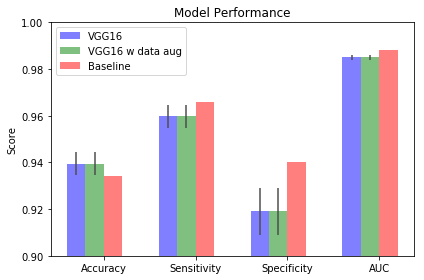

In [14]:
opacity = 0.5
error_config = {'ecolor': '0.3'}
seFactor = 2.0

VGG16Means = (np.mean(AccListVGG16),
              np.mean(SensListVGG16),
              np.mean(SpecListVGG16),
              np.mean(aucListVGG16))
VGG16SEs = (seFactor*sem(AccListVGG16),
            seFactor*sem(SensListVGG16),
            seFactor*sem(SpecListVGG16),
            seFactor*sem(aucListVGG16))
n_groups = len(VGG16Means)

VGG16AugMeans = (np.mean(AccListVGG16Aug),
                  np.mean(SensListVGG16Aug),
                  np.mean(SpecListVGG16Aug),
                  np.mean(aucListVGG16Aug))
VGG16AugSEs = (seFactor*sem(AccListVGG16Aug),
                seFactor*sem(SensListVGG16Aug),
                seFactor*sem(SpecListVGG16Aug),
                seFactor*sem(aucListVGG16Aug))

reportedMetrics = [reportedAcc, 
                   reportedSens, 
                   reportedSpec,
                   reportedAuc]

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
rects1 = ax.bar(index - bar_width, VGG16Means, bar_width,
                alpha=opacity, color='b',
                yerr=VGG16SEs, error_kw=error_config,
                label='VGG16')

rects2 = ax.bar(index, VGG16Means, bar_width,
                alpha=opacity, color='g',
                yerr=VGG16SEs, error_kw=error_config,
                label='VGG16 w data aug')

rects3 = ax.bar(index + bar_width, reportedMetrics, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='Baseline')

#ax.set_xlabel('Group')
ax.set_ylabel('Score')
ax.set_title('Model Performance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Accuracy', 'Sensitivity', 'Specificity', 'AUC'))
ax.set_ylim([0.9, 1.0])
ax.legend()

fig.tight_layout()
plt.show()

# InceptionV3

subsample 1


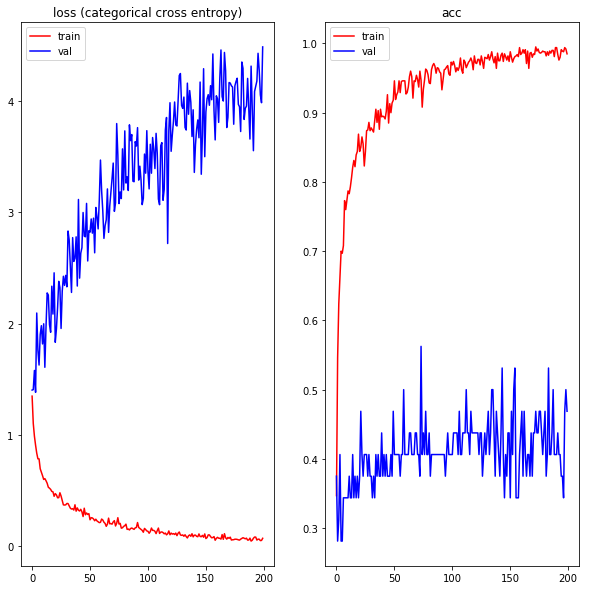

subsample 2


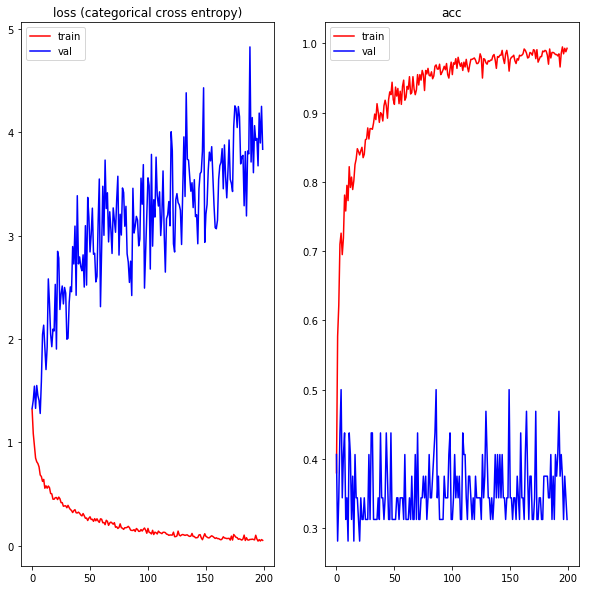

subsample 3


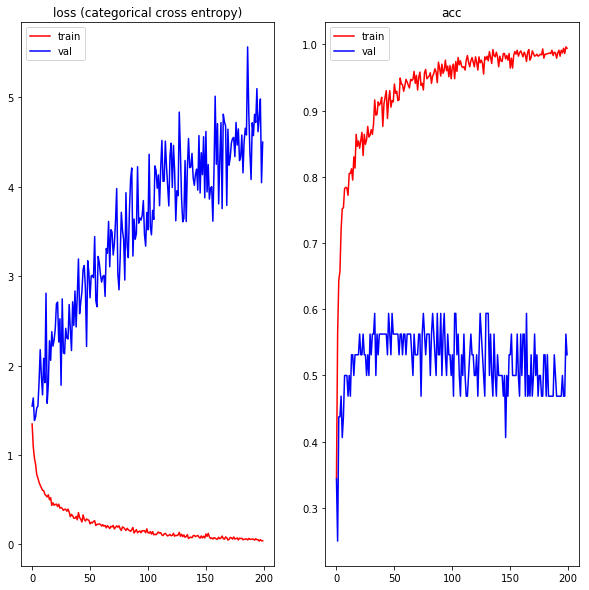

subsample 4


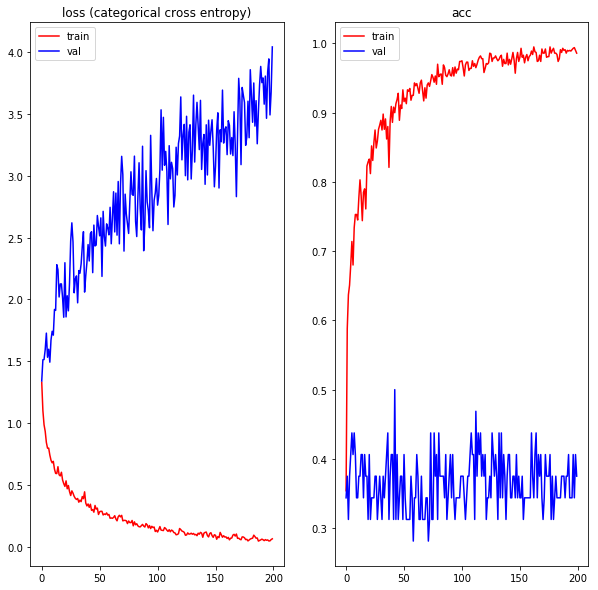

subsample 5


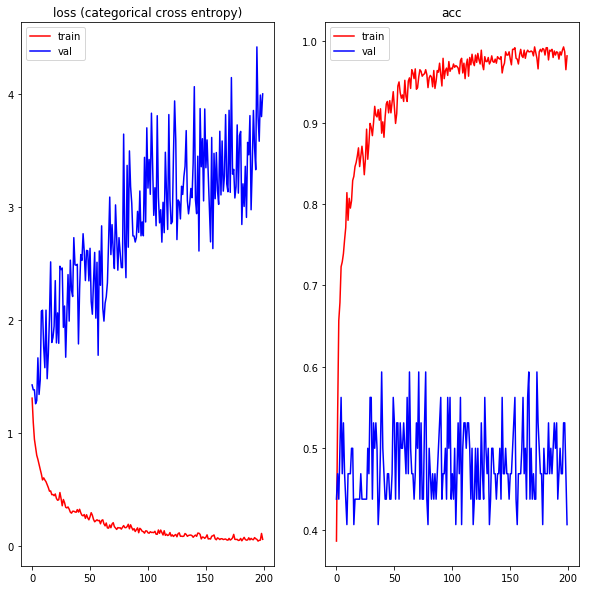

subsample 6


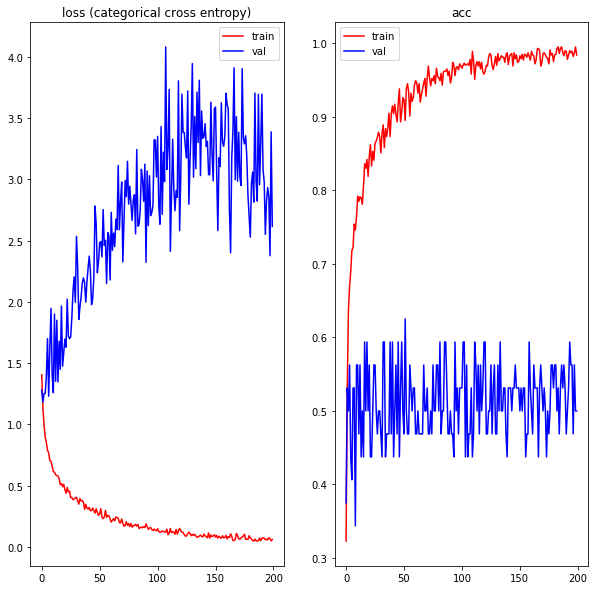

subsample 7


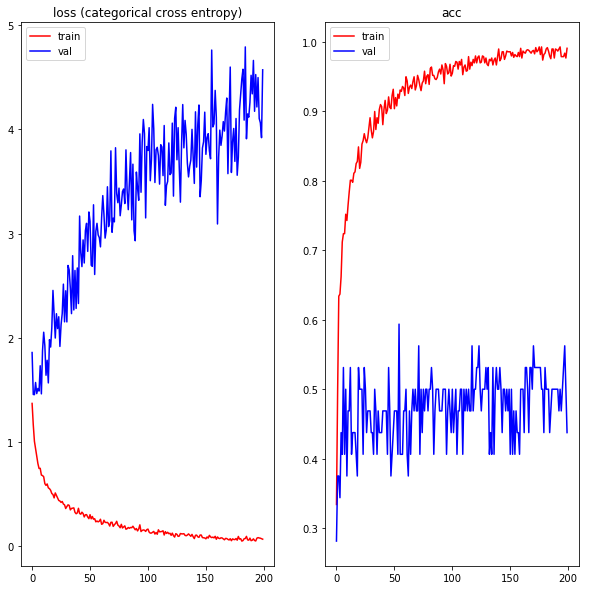

subsample 8


In [ ]:
varainceExperimentDirInceptionV3 = join(projectDir, "..\modelOutput\subsample_InceptionV3")
plotLosses(varainceExperimentDirInceptionV3, modelName="InceptionV3")

In [19]:
InceptionV3PredPath = r"InceptionV3\modelPredUrgetDF.csv"
modelPredUrgetDF = pd.read_csv(join(thisPath, InceptionV3PredPath), index_col=0)

AccListInceptionV3 = []
SensListInceptionV3 = []
SpecListInceptionV3 = []

aucListInceptionV3 = []
fprsListInceptionV3 = []
tprsListInceptionV3 = []

yTrueUrgent = modelPredUrgetDF['yTrue'].values
for i in range(0, 10):
    yPredProbUrgent = modelPredUrgetDF['yPredProb_' + str(i)].values
    scores = reportBinaryScores(yTrueUrgent, yPredProbUrgent, v=1)
    acc, tpr, tnr, plr, nlr = scores
    
    fprs, tprs, _ = roc_curve(yTrueUrgent, yPredProbUrgent)
    aucUrgent = auc(fprs, tprs)
    
    AccListInceptionV3.append(acc)
    SensListInceptionV3.append(tpr)
    SpecListInceptionV3.append(tnr)
    
    aucListInceptionV3.append(aucUrgent)
    fprsListInceptionV3.append(fprs)
    tprsListInceptionV3.append(tprs)

	 accuracy: 0.603
	 sensitivity 0.583
	 specificity 0.624
	 positive likelihood ratio 1.55
	 negative likelihood ratio 0.669


	 accuracy: 0.67
	 sensitivity 0.746
	 specificity 0.595
	 positive likelihood ratio 1.84
	 negative likelihood ratio 0.427


	 accuracy: 0.521
	 sensitivity 0.0971
	 specificity 0.944
	 positive likelihood ratio 1.74
	 negative likelihood ratio 0.956


	 accuracy: 0.638
	 sensitivity 0.531
	 specificity 0.746
	 positive likelihood ratio 2.09
	 negative likelihood ratio 0.629


	 accuracy: 0.67
	 sensitivity 0.543
	 specificity 0.798
	 positive likelihood ratio 2.68
	 negative likelihood ratio 0.573


	 accuracy: 0.573
	 sensitivity 0.298
	 specificity 0.849
	 positive likelihood ratio 1.97
	 negative likelihood ratio 0.827


	 accuracy: 0.569
	 sensitivity 0.612
	 specificity 0.527
	 positive likelihood ratio 1.29
	 negative likelihood ratio 0.737


	 accuracy: 0.517
	 sensitivity 0.911
	 specificity 0.122
	 positive likelihood ratio 1.04
	 negative likelihood

# ResNet50

subsample 1


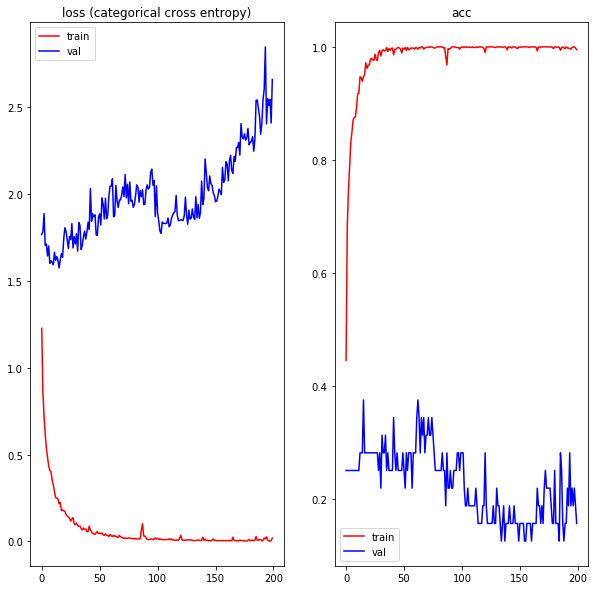

subsample 2


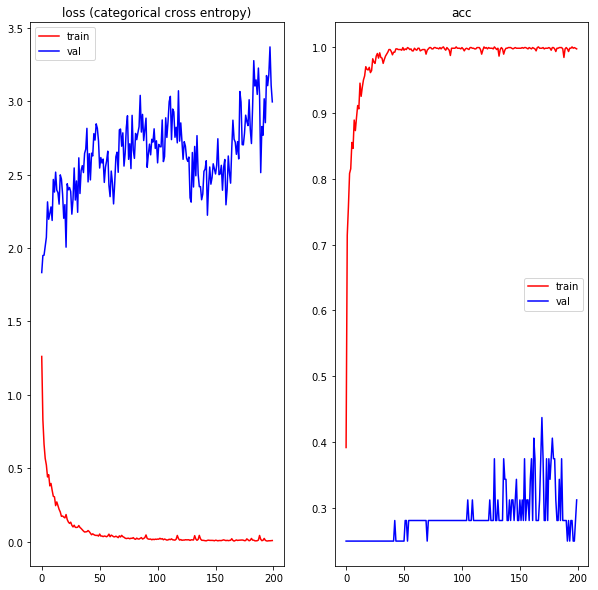

subsample 3


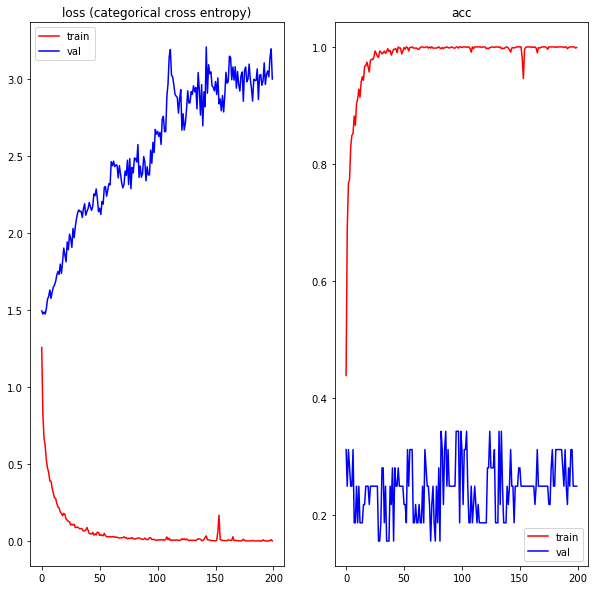

subsample 4


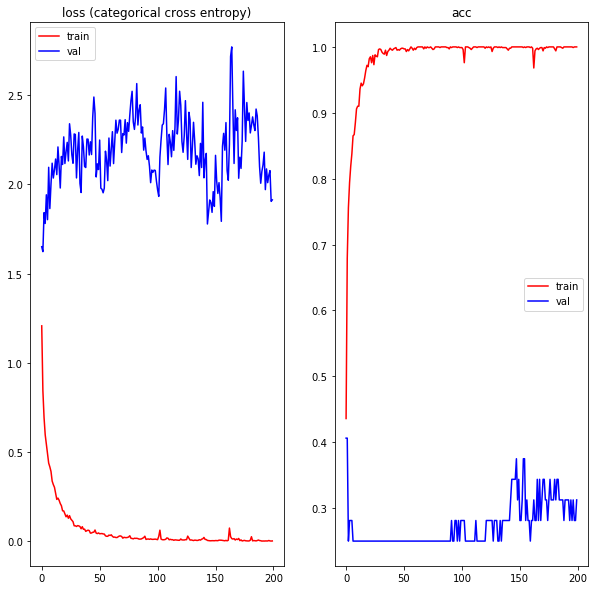

subsample 5


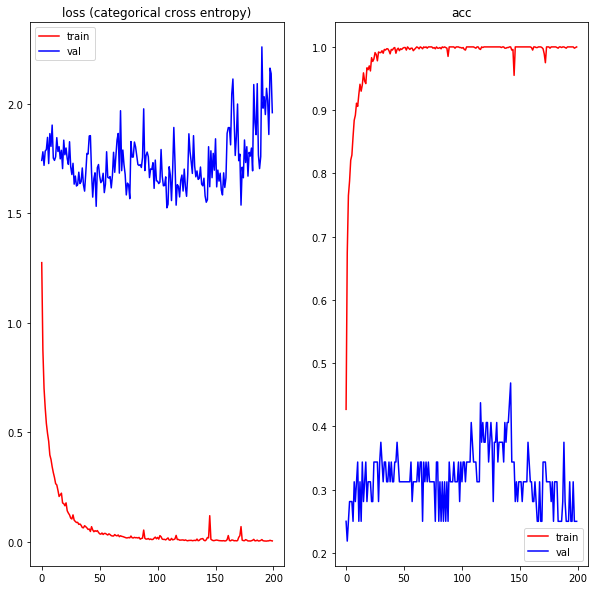

subsample 6


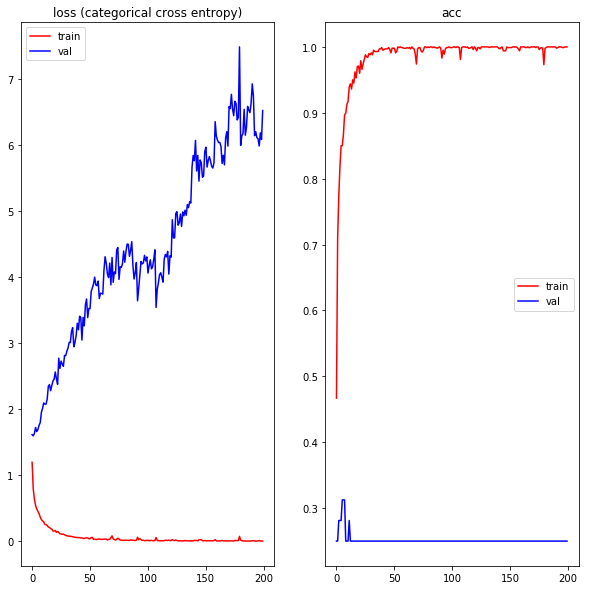

subsample 7


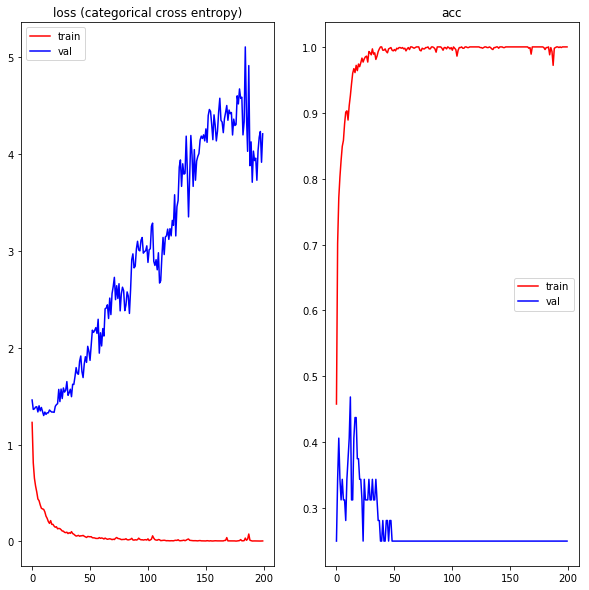

subsample 8


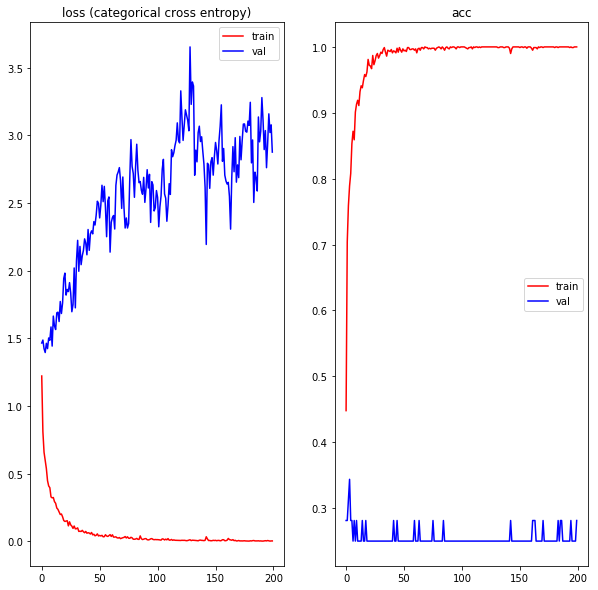

subsample 9


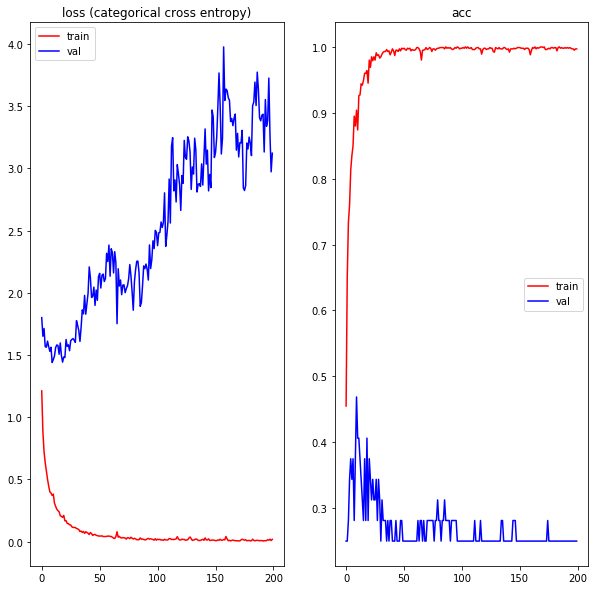

subsample 10


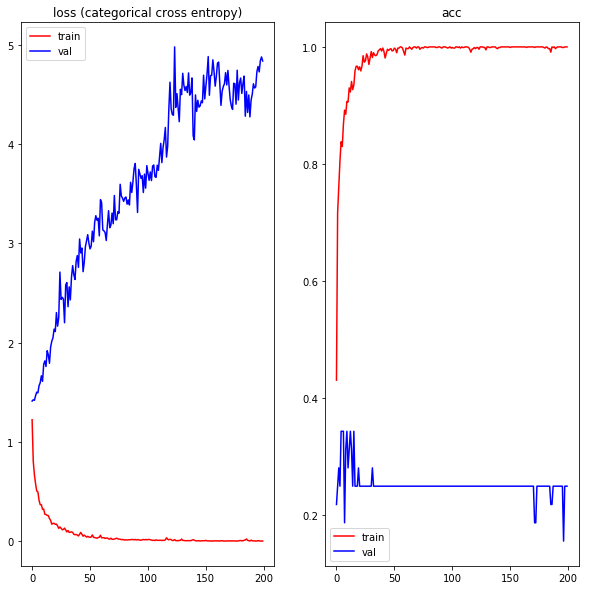

In [5]:
varainceExperimentDirResNet50 = join(projectDir, "..\modelOutput\subsample_ResNet50")
plotLosses(varainceExperimentDirResNet50, modelName="ResNet50")

In [20]:
ResNet50PredPath = r"ResNet50\modelPredUrgetDF.csv"
modelPredUrgetDF = pd.read_csv(join(thisPath, ResNet50PredPath), index_col=0)

AccListResNet50 = []
SensListResNet50 = []
SpecListResNet50 = []

aucListResNet50 = []
fprsListResNet50 = []
tprsListResNet50 = []

yTrueUrgent = modelPredUrgetDF['yTrue'].values
for i in range(0, 10):
    yPredProbUrgent = modelPredUrgetDF['yPredProb_' + str(i)].values
    scores = reportBinaryScores(yTrueUrgent, yPredProbUrgent, v=1)
    acc, tpr, tnr, plr, nlr = scores
    
    fprs, tprs, _ = roc_curve(yTrueUrgent, yPredProbUrgent)
    aucUrgent = auc(fprs, tprs)
    
    AccListResNet50.append(acc)
    SensListResNet50.append(tpr)
    SpecListResNet50.append(tnr)
    
    aucListResNet50.append(aucUrgent)
    fprsListResNet50.append(fprs)
    tprsListResNet50.append(tprs)

	 accuracy: 0.485
	 sensitivity 0.955
	 specificity 0.0145
	 positive likelihood ratio 0.969
	 negative likelihood ratio 3.14




C:\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


	 accuracy: 0.503
	 sensitivity 0.0062
	 specificity 1
	 positive likelihood ratio inf
	 negative likelihood ratio 0.994


	 accuracy: 0.528
	 sensitivity 0.264
	 specificity 0.791
	 positive likelihood ratio 1.27
	 negative likelihood ratio 0.93


	 accuracy: 0.68
	 sensitivity 0.432
	 specificity 0.928
	 positive likelihood ratio 5.97
	 negative likelihood ratio 0.612


	 accuracy: 0.541
	 sensitivity 0.938
	 specificity 0.145
	 positive likelihood ratio 1.1
	 negative likelihood ratio 0.429


	 accuracy: 0.652
	 sensitivity 0.653
	 specificity 0.651
	 positive likelihood ratio 1.87
	 negative likelihood ratio 0.533


	 accuracy: 0.588
	 sensitivity 0.304
	 specificity 0.872
	 positive likelihood ratio 2.37
	 negative likelihood ratio 0.799


	 accuracy: 0.624
	 sensitivity 0.312
	 specificity 0.936
	 positive likelihood ratio 4.87
	 negative likelihood ratio 0.735


	 accuracy: 0.549
	 sensitivity 0.901
	 specificity 0.196
	 positive likelihood ratio 1.12
	 negative likelihood ratio

# Xception

subsample 1


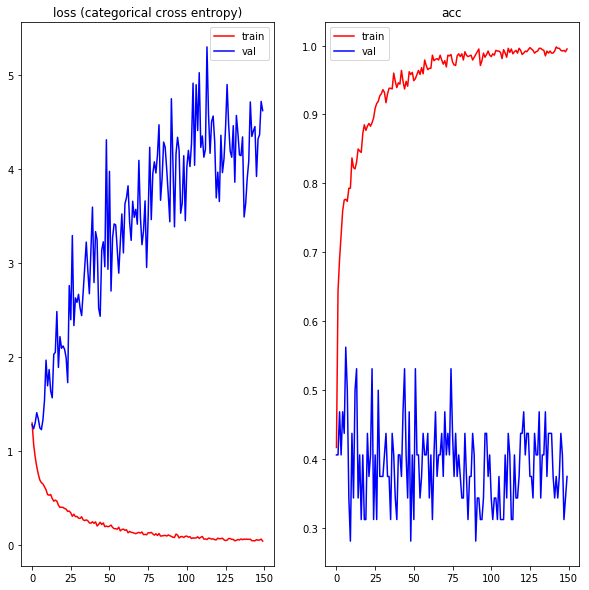

subsample 2


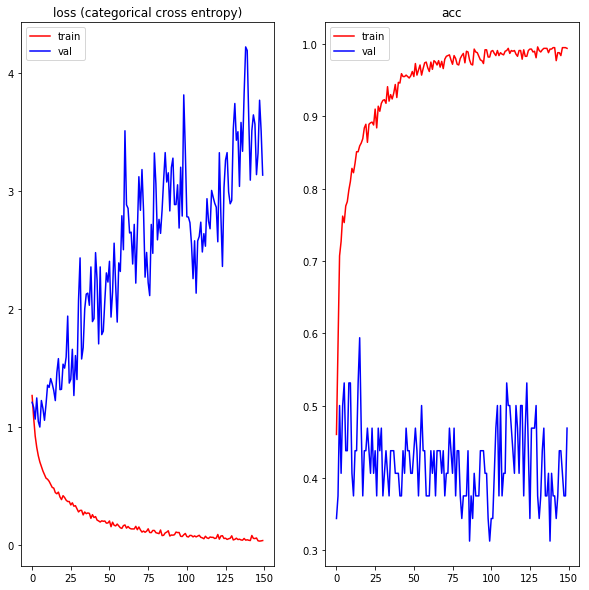

subsample 3


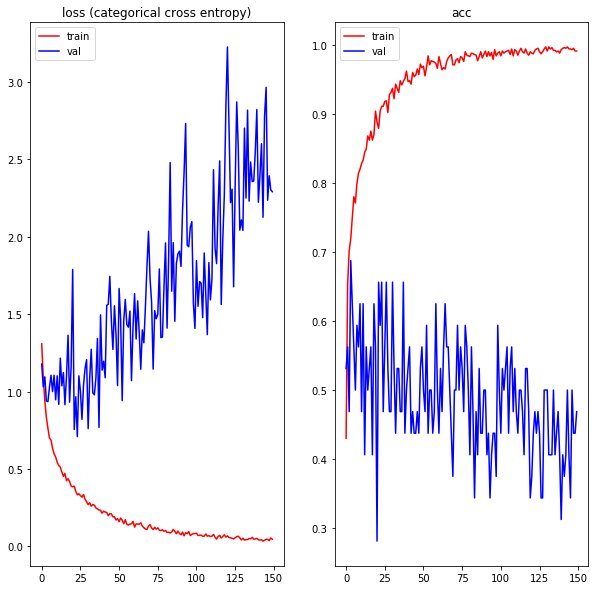

subsample 4


In [ ]:
varainceExperimentDirXception = join(projectDir, "..\modelOutput\subsample_Xception")
plotLosses(varainceExperimentDirXception, modelName="Xception")

In [22]:
XceptionPredPath = r"Xception\modelPredUrgetDF.csv"
modelPredUrgetDF = pd.read_csv(join(thisPath, XceptionPredPath), index_col=0)

AccListXception = []
SensListXception = []
SpecListXception = []

aucListXception = []
fprsListXception = []
tprsListXception = []

yTrueUrgent = modelPredUrgetDF['yTrue'].values
for i in range(0, 10):
    yPredProbUrgent = modelPredUrgetDF['yPredProb_' + str(i)].values
    scores = reportBinaryScores(yTrueUrgent, yPredProbUrgent, v=1)
    acc, tpr, tnr, plr, nlr = scores
    
    fprs, tprs, _ = roc_curve(yTrueUrgent, yPredProbUrgent)
    aucUrgent = auc(fprs, tprs)
    
    AccListXception.append(acc)
    SensListXception.append(tpr)
    SpecListXception.append(tnr)
    
    aucListXception.append(aucUrgent)
    fprsListXception.append(fprs)
    tprsListXception.append(tprs)

	 accuracy: 0.65
	 sensitivity 0.849
	 specificity 0.45
	 positive likelihood ratio 1.55
	 negative likelihood ratio 0.335


	 accuracy: 0.586
	 sensitivity 0.535
	 specificity 0.636
	 positive likelihood ratio 1.47
	 negative likelihood ratio 0.731


	 accuracy: 0.737
	 sensitivity 0.599
	 specificity 0.874
	 positive likelihood ratio 4.75
	 negative likelihood ratio 0.459


	 accuracy: 0.682
	 sensitivity 0.556
	 specificity 0.808
	 positive likelihood ratio 2.89
	 negative likelihood ratio 0.55


	 accuracy: 0.723
	 sensitivity 0.752
	 specificity 0.694
	 positive likelihood ratio 2.46
	 negative likelihood ratio 0.357


	 accuracy: 0.57
	 sensitivity 0.225
	 specificity 0.915
	 positive likelihood ratio 2.66
	 negative likelihood ratio 0.847


	 accuracy: 0.677
	 sensitivity 0.655
	 specificity 0.698
	 positive likelihood ratio 2.17
	 negative likelihood ratio 0.494


	 accuracy: 0.679
	 sensitivity 0.771
	 specificity 0.587
	 positive likelihood ratio 1.86
	 negative likelihood ra

In [18]:
VGG16PredPath = r"VGG16\modelPredUrgetDF.csv"
VGG16AugPredPath = r"VGG16_aug\modelPredUrgetDF.csv"

ResNet50PredPath = r"ResNet50\modelPredUrgetDF.csv"
InceptionV3PredPath = r"InceptionV3\modelPredUrgetDF.csv"
XceptionPredPath = r"Xception\modelPredUrgetDF.csv"


pathList = [VGG16PredPath, 
            VGG16AugPredPath, 
            ResNet50PredPath, 
            InceptionV3PredPath, 
            XceptionPredPath]
modelList = ['VGG16', 'VGG16_aug', 'ResNet50', 'InceptionV3', 'Xception']

modelPredDict = {}
modelScoreDict = {}
recordedMetrics = ('Accuracy', 'Sensitivity', 'Specificity', 
                   'roc_fprs', 'roc_tprs', 'AUC')
for model, predPath in zip(modelList, pathList):
    print(model)
    modelPredUrgetDF = pd.read_csv(join(thisPath, VGG16AugPredPath), index_col=0)
    modelPredDict[model] = modelPredUrgetDF
    
    modelScoreDict[model] = {}
    for metric in recordedMetrics:
        modelScoreDict[model][metric] = []
    for i in range(0, 10):
        yPredProbUrgent = modelPredUrgetDF['yPredProb_' + str(i)].values
        scores = reportBinaryScores(yTrueUrgent, yPredProbUrgent, v=1)
        acc, tpr, tnr, plr, nlr = scores
        fprs, tprs, _ = roc_curve(yTrueUrgent, yPredProbUrgent)
        aucUrgent = auc(fprs, tprs)
        for metric in recordedMetrics:
            
            #
    modelScoreDict[model]['accuracy'] = acc
    modelScoreDict[model]['sensitivity'] = tpr
    modelScoreDict[model]['specificity'] = tnr
    modelScoreDict[model]['roc_fprs'] = fprs
    modelScoreDict[model]['roc_tprs'] = tprs
    modelScoreDict[model]['auc'] = aucUrgent
    

VGG16
	 accuracy: 0.933
	 sensitivity 0.955
	 specificity 0.911
	 positive likelihood ratio 10.7
	 negative likelihood ratio 0.0499


VGG16_aug
	 accuracy: 0.933
	 sensitivity 0.955
	 specificity 0.911
	 positive likelihood ratio 10.7
	 negative likelihood ratio 0.0499


ResNet50
	 accuracy: 0.933
	 sensitivity 0.955
	 specificity 0.911
	 positive likelihood ratio 10.7
	 negative likelihood ratio 0.0499


InceptionV3
	 accuracy: 0.933
	 sensitivity 0.955
	 specificity 0.911
	 positive likelihood ratio 10.7
	 negative likelihood ratio 0.0499


Xception
	 accuracy: 0.933
	 sensitivity 0.955
	 specificity 0.911
	 positive likelihood ratio 10.7
	 negative likelihood ratio 0.0499




We also trained a “limited model” classifying between the same four categories but only using 1,000 images randomly selected from each class during training to compare transfer learning performance using limited data compared to results using a large dataset. Using the same testing images, the model achieved an accuracy of 93.4%, with a sensitivity of 96.6%, a specificity of 94.0%, and a weighted error of 12.7%. The ROC curves distinguishing urgent referrals (i.e., distinguishing images with choroidal neovascularization or diabetic macular edema from normal images had an area under the curve of 98.8%.